# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP (he will teach the Geopanda lecture).
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


In [1]:
import os
import sys
import numpy as np
import pylab as pl
import pandas as pd
import json
import os
s = json.load( open(os.getenv("PUI2016")+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)
%pylab inline

from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)

## note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the no.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```


as opposed to just 

use the no.nansum etc
```
np.mean(mtarides)
np.sum(mtarides)
```

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [2]:
mtarides = np.load("MTA_Fare.npy")
print(mtarides.shape)  #600 - Manhattan stations, 23 type of card swipes and 194 rides

(600, 23, 194)


In [3]:
mtarides = mtarides.astype(float)  #changed the values to float in mtarides

In [4]:
mtarides[mtarides == -1] = 'nan'  #replacing the -1 entries with NaN
np.where(mtarides == -1)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [5]:
#sum up all 23 different ridership by stations and time
mta1 = np.nansum(mtarides, axis=1, dtype = None, out = None, keepdims=0)
print("the shape of numpy array before transpose",mta1.shape)
mta1 = mta1.transpose()
print("the shape of numpy array after transpose",mta1.shape)

('the shape of numpy array before transpose', (600, 194))
('the shape of numpy array after transpose', (194, 600))


In [6]:
#converting array to a dataframe
mta_df = pd.DataFrame(mta1)

In [7]:
#Setting index of dataframe as dates per week for 194 weeks from 05/21/2010 to 02/07/2014.
mta_df.index= pd.Index(pd.date_range(pd.to_datetime('05/21/2010'), pd.to_datetime('02/07/2014'), freq = 'W'))
print(mta_df.shape)
mta_df.head()

(194, 600)


0        1       2        3        4        5        6    \
2010-05-23  126878.0  37306.0  6606.0  16378.0  18564.0  19987.0  12449.0   
2010-05-30  149477.0  46464.0  6881.0  17408.0  19903.0  20625.0  13644.0   
2010-06-06  152383.0  49359.0  7229.0  17595.0  19948.0  21225.0  13719.0   
2010-06-13  160175.0  44849.0  5731.0  14242.0  16076.0  17412.0  11460.0   
2010-06-20  162641.0  41509.0  7032.0  17589.0  20283.0  20909.0  14094.0   

                7        8         9   ...   590  591  592  593  594  595  \
2010-05-23  11091.0  10482.0  147187.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-05-30  11659.0  11030.0  154826.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-06  12037.0  10881.0  155958.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-13   9809.0   9123.0  154914.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-20  11944.0  10923.0  157628.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   

            596  597  598  599  
2010-05-23  0.0  0.0  0.0  0.0  
2010-05-30  0.0  0.0  0.0  0.0  
2010-06-06  0.0  0.0  0.0  0.0  
2010-06-13  0.0  0.0  0.0  0.0  
2010-06-20  0.0  0.0  0.0  0.0  

[5 rows x 600 columns]

### Exploratory stage

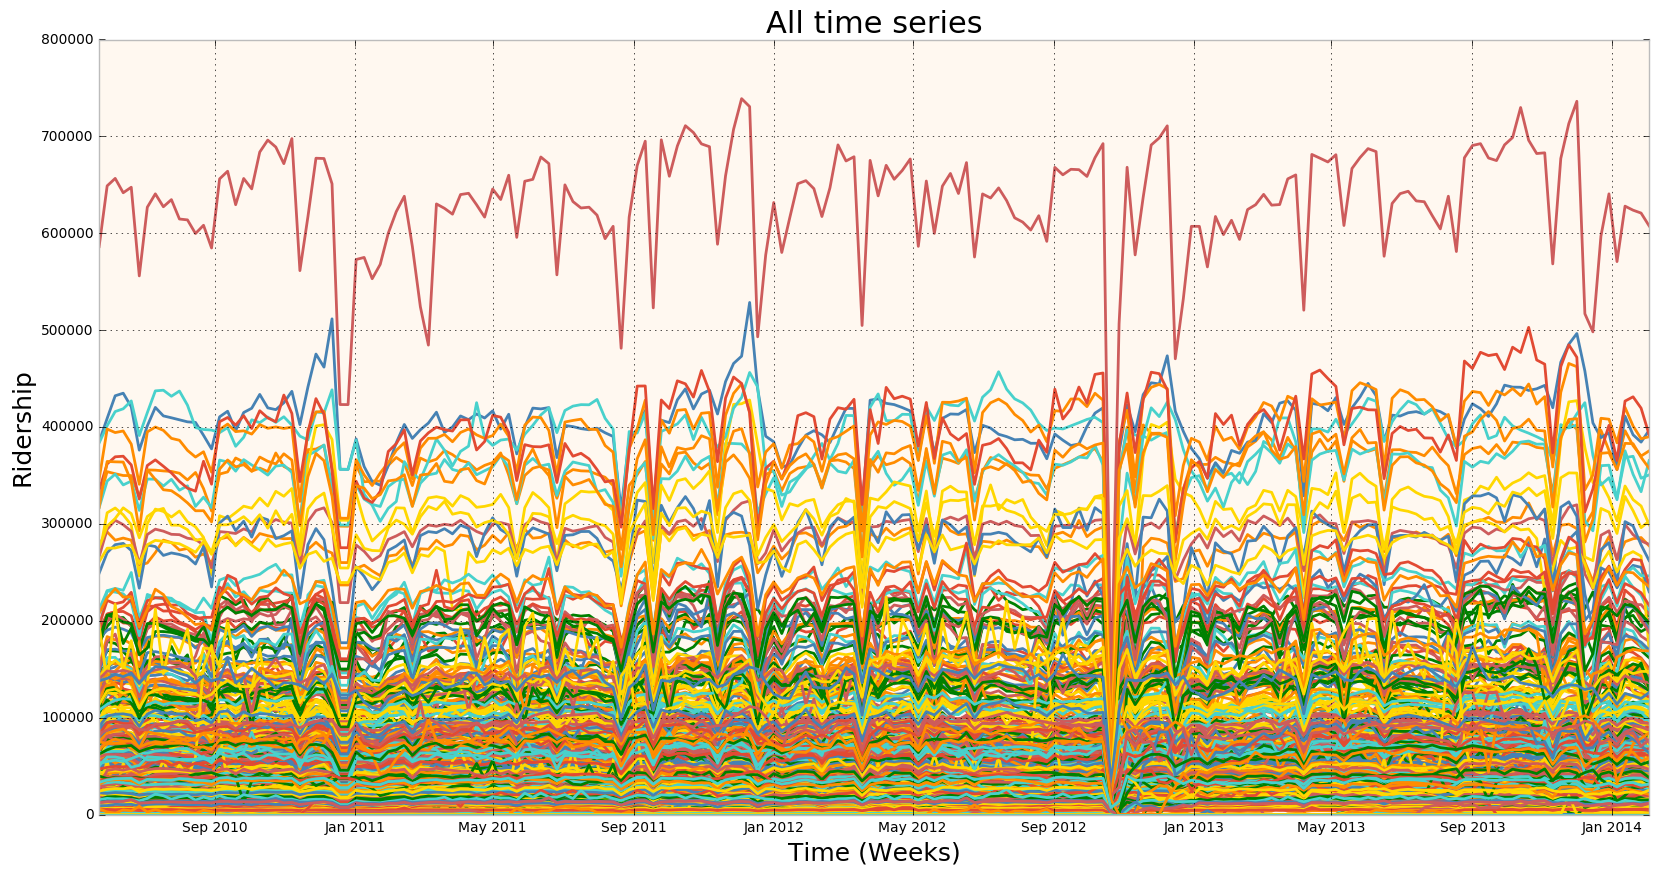

In [8]:
plt.figure(figsize=(20,10))
pl.plot(mta_df.index, mta_df) 
pl.ylabel("Ridership", fontsize=18)
pl.xlabel("Time (Weeks)", fontsize=18)
pl.title("All time series", fontsize=22)

####  Figure 1: All time series in the dataset. The plot doesn't give much information about the timeseries patterns.

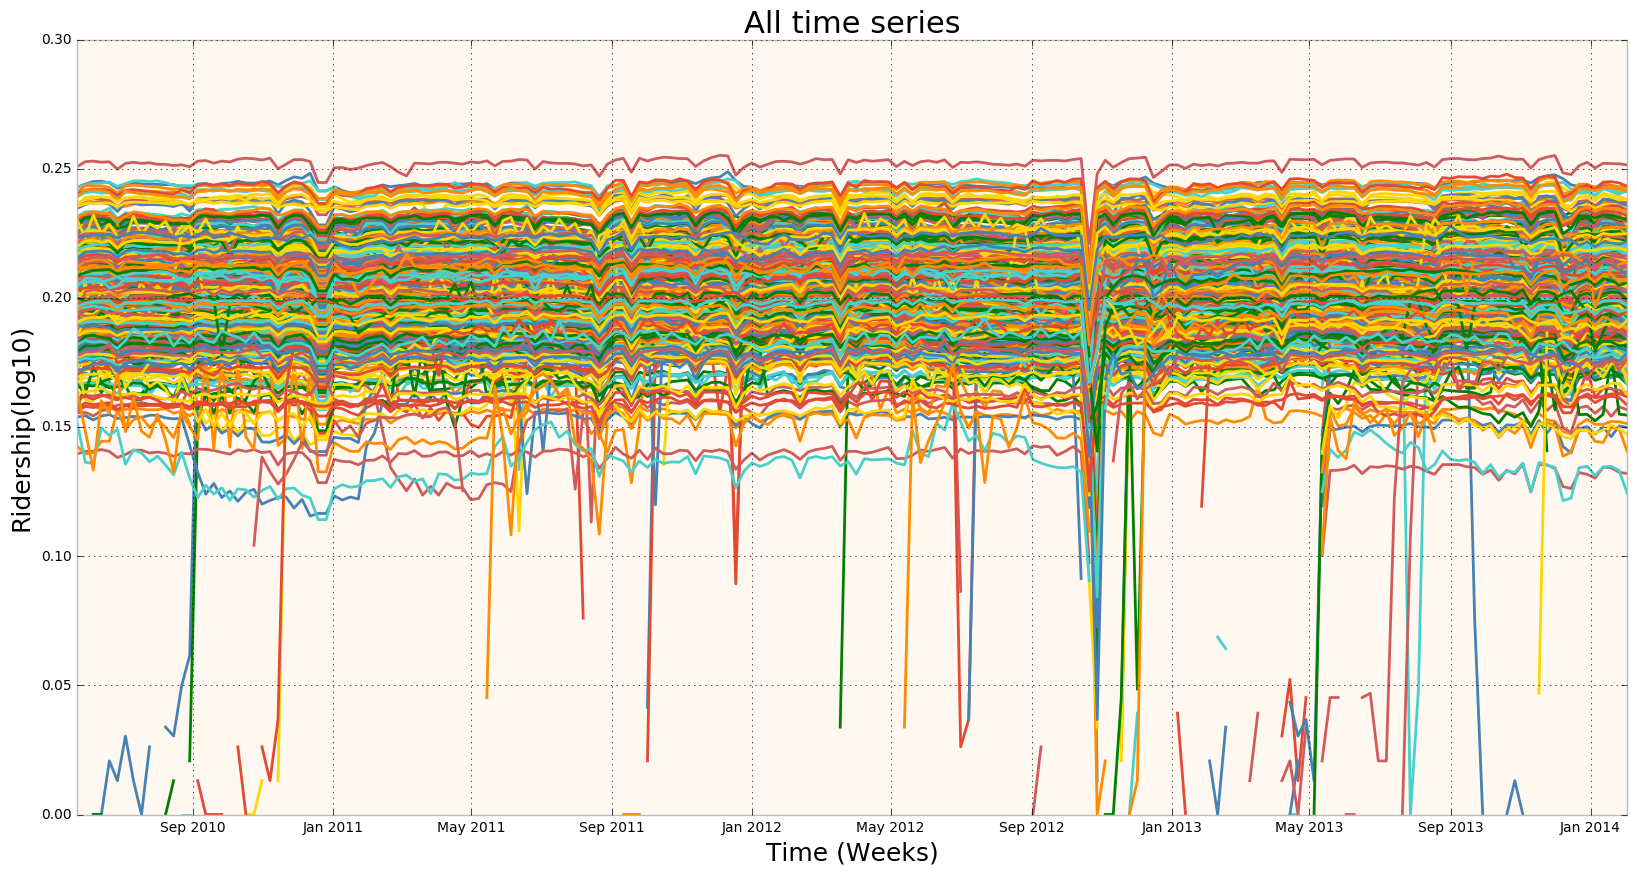

In [9]:
plt.figure(figsize=(20,10))
pl.plot(mta_df.index, np.log10(mta_df)/23) 
pl.ylabel("Ridership(log10)", fontsize=18)
pl.xlabel("Time (Weeks)", fontsize=18)
pl.title("All time series", fontsize=22)

#### Figure 2: The time series of all stations is normalised and the ridership is in log space. The plot shows prominent drops for few time series.

In [10]:
mta_dfred = pd.DataFrame()
mta_dfred['ridership']= mta_df.sum(axis=1) #summing the rides of all the 600 subway stations.
mta_dfred = mta_dfred[['ridership']]
mta_dfred.head()

ridership
2010-05-23  26720267.0
2010-05-30  29265971.0
2010-06-06  29601189.0
2010-06-13  29387592.0
2010-06-20  29185768.0

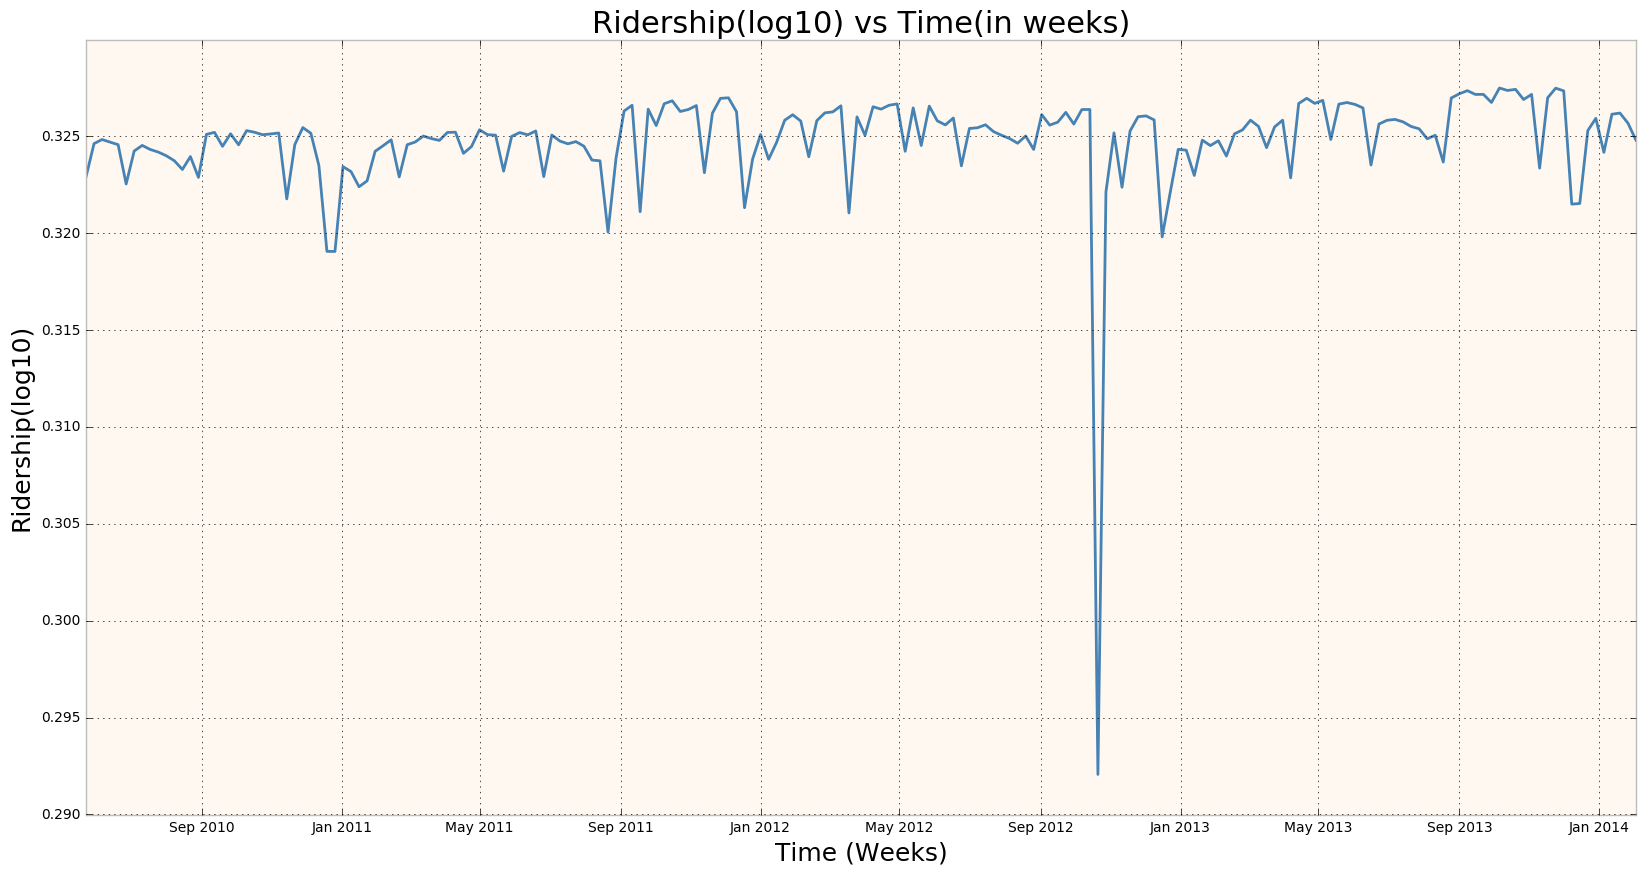

In [11]:
plt.figure(figsize=(20,10))
pl.plot(mta_dfred.index, np.log10(mta_dfred)/23) 
pl.ylabel("Ridership(log10)", fontsize=18)
pl.xlabel("Time (Weeks)", fontsize=18)
pl.title("Ridership(log10) vs Time(in weeks)", fontsize=22)

#### Figure 3: Ridershiplog10) against weeks with sum of all rides. The plot shows prominent drop somewhere in October 2012.

Let's figure out the exact date of this prominent drop in ridership.

In [12]:
print ("mean Ridership by week {:.2f}".format(mta_dfred['ridership'].mean())) #mean of ridership
print ("stdev Ridership by week {:.2f}".format(mta_dfred['ridership'].std())) #standard deviation of ridershp
thresholds = [mta_dfred['ridership'].mean() + 3 * mta_dfred['ridership'].std(),  #calulating threshold i.e below and above 3 sigma
              mta_dfred['ridership'].mean() - 3 * mta_dfred['ridership'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(mta_dfred.index))

mean Ridership by week 29781349.87
stdev Ridership by week 2991680.90
3-sigma thresholds 38756392.58 20806307.17
('earliest datapoint', Timestamp('2010-05-23 00:00:00', offset='W-SUN'))


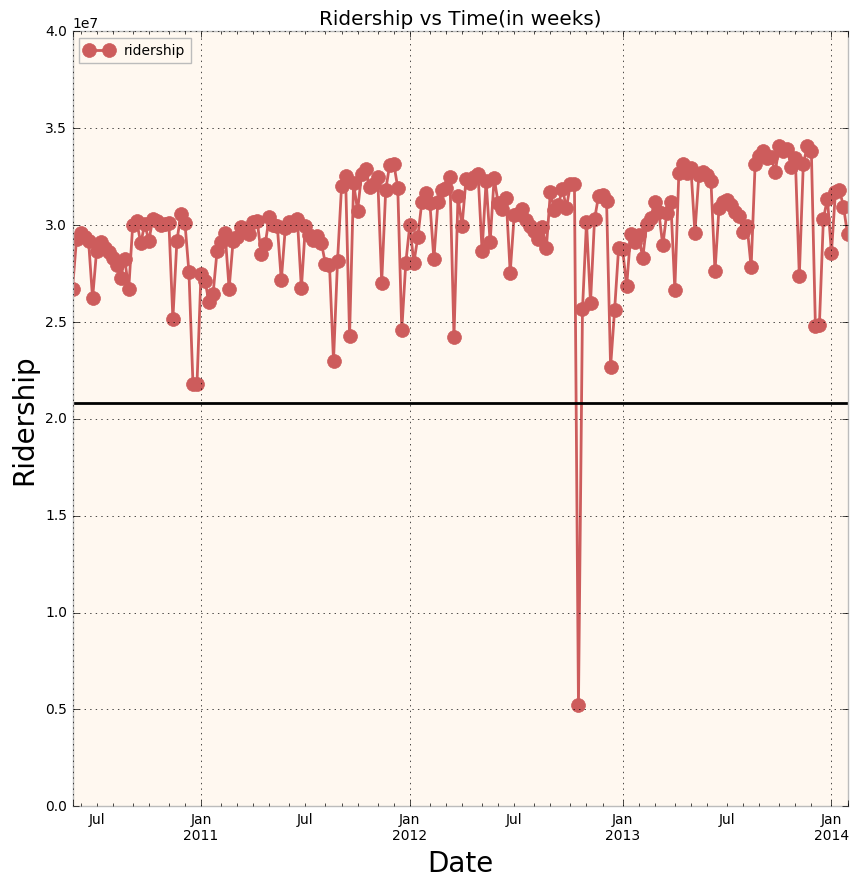

In [13]:
ax = mta_dfred.plot(figsize=(10,10), style=".-", ms=20, color="IndianRed")  #Plotting the dataframe with x= time, y= Ridership
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='k') #plotting the threshold
pl.legend(fontsize=20)
pl.ylim(0,4e7)
pl.title("Ridership vs Time(in weeks)")
pl.ylabel("Ridership", fontsize=20)
pl.xlabel("Date", fontsize=20)
pl.legend(loc= "upper left")

#### Figure 4: Ridership(log10) against weeks with sum of all rides and the lower threshold. The plot shows one prominent drop below the lower threshold.

In [14]:
mta_dfred.loc[(mta_dfred.ridership < thresholds[1])] #calcualting the event below the threshold( significant drop in plot)

ridership
2012-10-21  5218686.0

see http://www.nytimes.com/interactive/2012/10/28/nyregion/hurricane-sandy.html?_r=0

Hurricane Sandy swept across New York, New Jersey and Connecticut. We can see how total number of rides across all the 600 station dropped because of the devastation that took place on 10 November,2012. 

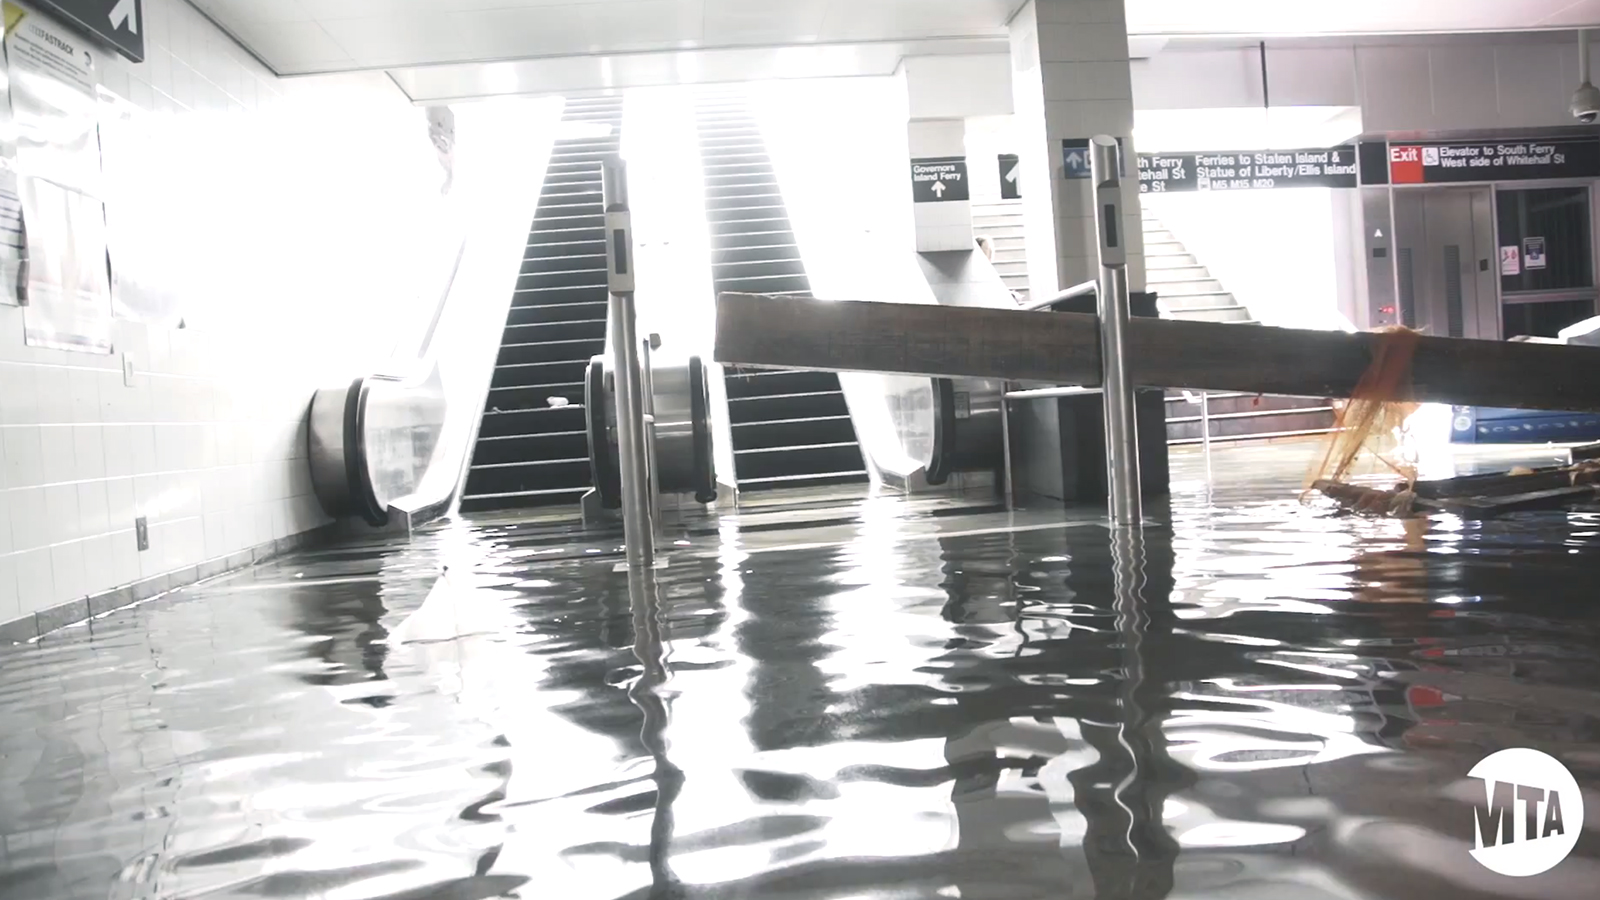

In [15]:
from IPython.core.display import Image, display
display(Image('HurricaneSandy.jpg'))

### Since Hurricane Sandy hit Newyork on 28 Oct,2012. We re-specified the pd.data_range starting from 28 may 2010,  to get the right result.

In [16]:
#Setting index of dataframe as dates per week for 194 weeks from 05/21/2010 to 02/07/2014.
mta_df1 = pd.DataFrame(mta1)
mta_df1.index= pd.Index(pd.date_range(pd.to_datetime('05/28/2010'), pd.to_datetime('02/14/2014'), freq = 'W'))
print(mta_df1.shape)
mta_df1['ridership']= mta_df1.sum(axis=1)
mta_df1 = mta_df1[['ridership']]
mta_df1.head()

(194, 600)


ridership
2010-05-30  26720267.0
2010-06-06  29265971.0
2010-06-13  29601189.0
2010-06-20  29387592.0
2010-06-27  29185768.0

mean Ridership by week 29781349.87
stdev Ridership by week 2991680.90
3-sigma thresholds 38756392.58 20806307.17
('earliest datapoint', Timestamp('2010-05-23 00:00:00', offset='W-SUN'))
('The minimum number of rides were in the week \n ',             ridership
2012-10-28  5218686.0)


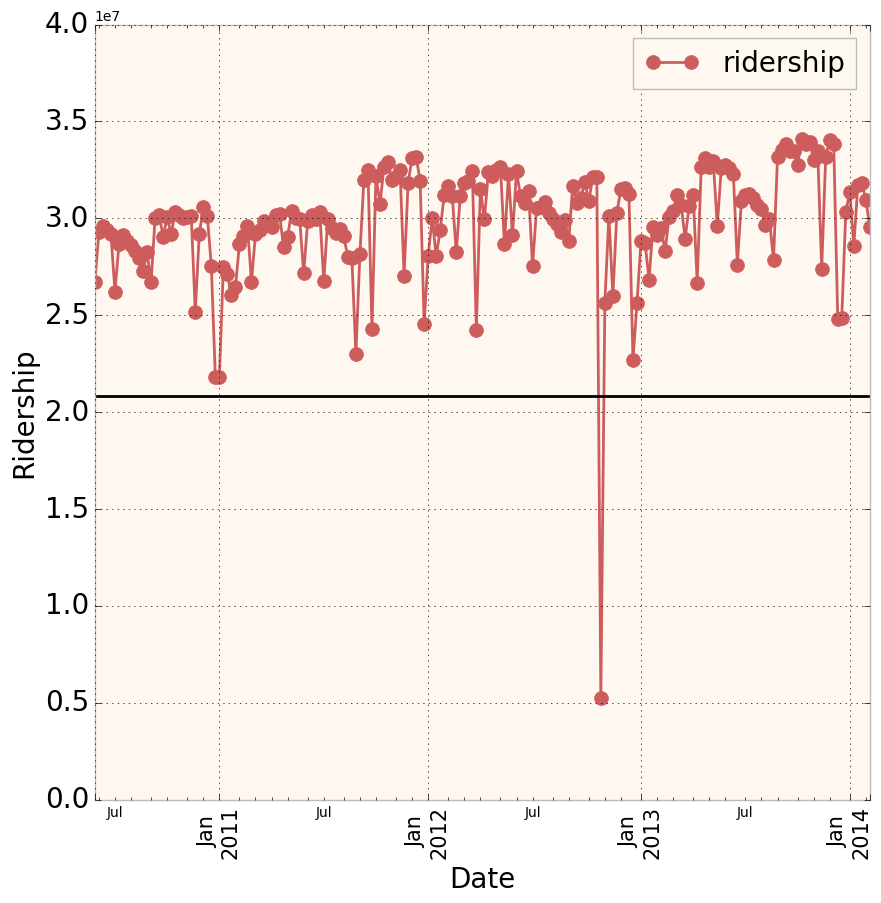

In [17]:
print ("mean Ridership by week {:.2f}".format(mta_df1['ridership'].mean()))
print ("stdev Ridership by week {:.2f}".format(mta_df1['ridership'].std()))
thresholds = [mta_df1['ridership'].mean() + 3 * mta_df1['ridership'].std(), 
              mta_df1['ridership'].mean() - 3 * mta_df1['ridership'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(mta_df.index))
ax = mta_df1.plot(figsize=(10,10), style=".-", ms=20, color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='k')
pl.xticks(rotation=90, fontsize=15)
pl.yticks(fontsize=20)
pl.ylim(0,4e7)
pl.legend(fontsize=20)
pl.ylabel("Ridership", fontsize=20)
pl.xlabel("Date", fontsize=20)

print("The minimum number of rides were in the week \n ",mta_df1.loc[(mta_df1.ridership < thresholds[1])])

#### Figure 5: Ridership(log10) against weeks with sum of all rides and the lower threshold. The plot shows one prominent drop below the lower threshold

In [18]:
mta_df1.loc[(mta_df1.ridership < thresholds[1])] #calcualting the event below the threshold( significant drop in plot)

ridership
2012-10-28  5218686.0

So, here we see the event occured on 28th Oct,2012, which is the actual date of the event.

## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [19]:
 #took avrerage of 600 submway staions for the type of swipes
mta2 = np.nanmean(mtarides, axis=0, dtype = None, out = None, keepdims=0)
mta2 = mta2.transpose()
print(mta2.shape)

(194, 23)


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [20]:
#naming the types of swipes/rides for subway
ridetype = ['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','st']

In [21]:
mta_df2 = pd.DataFrame(mta2) #converted numpy array to dataFrame
mta_df2.index= pd.Index(pd.date_range(pd.to_datetime('05/21/2010'), pd.to_datetime('02/07/2014'), freq = 'W')) 

In [31]:
mta_df2.columns = ridetype #changing the colums to ridenames
mta_df2.head()

10t          14d          1d          2t         30d  \
2010-05-23  24880.119048  1148.320346  103.465368  403.790043  101.316017   
2010-05-30  27173.229935  1265.798265  111.683297  432.167028  139.594360   
2010-06-06  27573.708423  1266.077754  111.524838  431.248380  123.097192   
2010-06-13  27329.751620  1215.123110  112.447084  424.166307   80.840173   
2010-06-20  27607.099138  1182.883621  110.243534  420.006466   75.883621   

                     7d           ada       afas         exp           ez ...  \
2010-05-23  8003.123377  18510.686147  21.781385  721.205628  1108.294372 ...   
2010-05-30  8637.327549  20577.861171  25.698482  613.351410  1253.845987 ...   
2010-06-06  8710.647948  20467.684665  26.516199  652.328294  1329.453564 ...   
2010-06-13  8710.049676  20410.542117  24.235421  659.855292  1309.438445 ...   
2010-06-20  8460.012931  20030.176724  22.661638  723.663793  1214.323276 ...   

                 month          rfm          rr        sen     spec  \
2010-05-23  266.523810  1710.194805  129.456710  61.084416  0.00000   
2010-05-30  329.605206  1969.778742  150.127983  70.136659  0.00000   
2010-06-06  327.295896  1974.349892  150.267819  70.449244  0.00000   
2010-06-13  317.697624  1949.349892  147.082073  69.987041  0.00000   
2010-06-20  297.172414  1843.907328  143.053879  68.821121  0.37931   

                  tcmc          t      umlim      xbus  st  
2010-05-23  269.898268  45.584416  13.264069  0.774892 NaN  
2010-05-30  264.019523  47.006508  13.275488  1.028200 NaN  
2010-06-06  263.889849  46.291577  14.017279  1.004320 NaN  
2010-06-13  263.609071  46.717063  14.233261  1.045356 NaN  
2010-06-20  258.137931  43.743534  13.605603  0.974138 NaN  

[5 rows x 23 columns]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


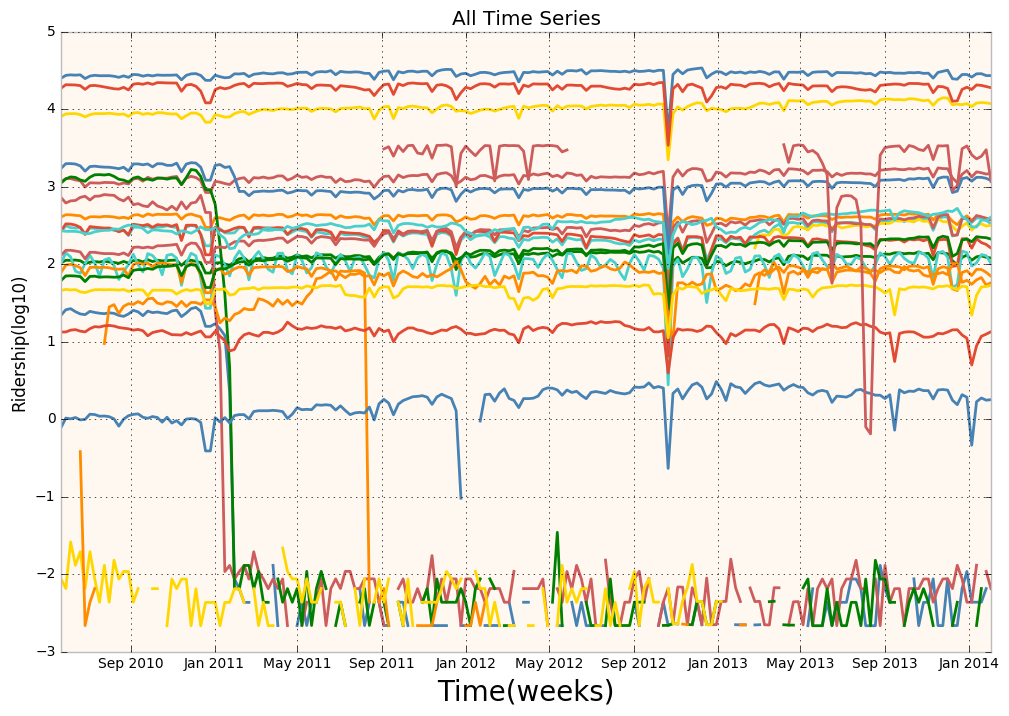

In [23]:
pl.figure(figsize=(12,8))
pl.plot(mta_df2.index, np.log10(mta_df2))
pl.title("All Time Series")
pl.xlabel("Time(weeks)", fontsize=20)
pl.ylabel("Ridership(log10)")
pl.legend(fontsize=10)

#### Figure 6: Ridership (log 10) aginst time in weeks

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


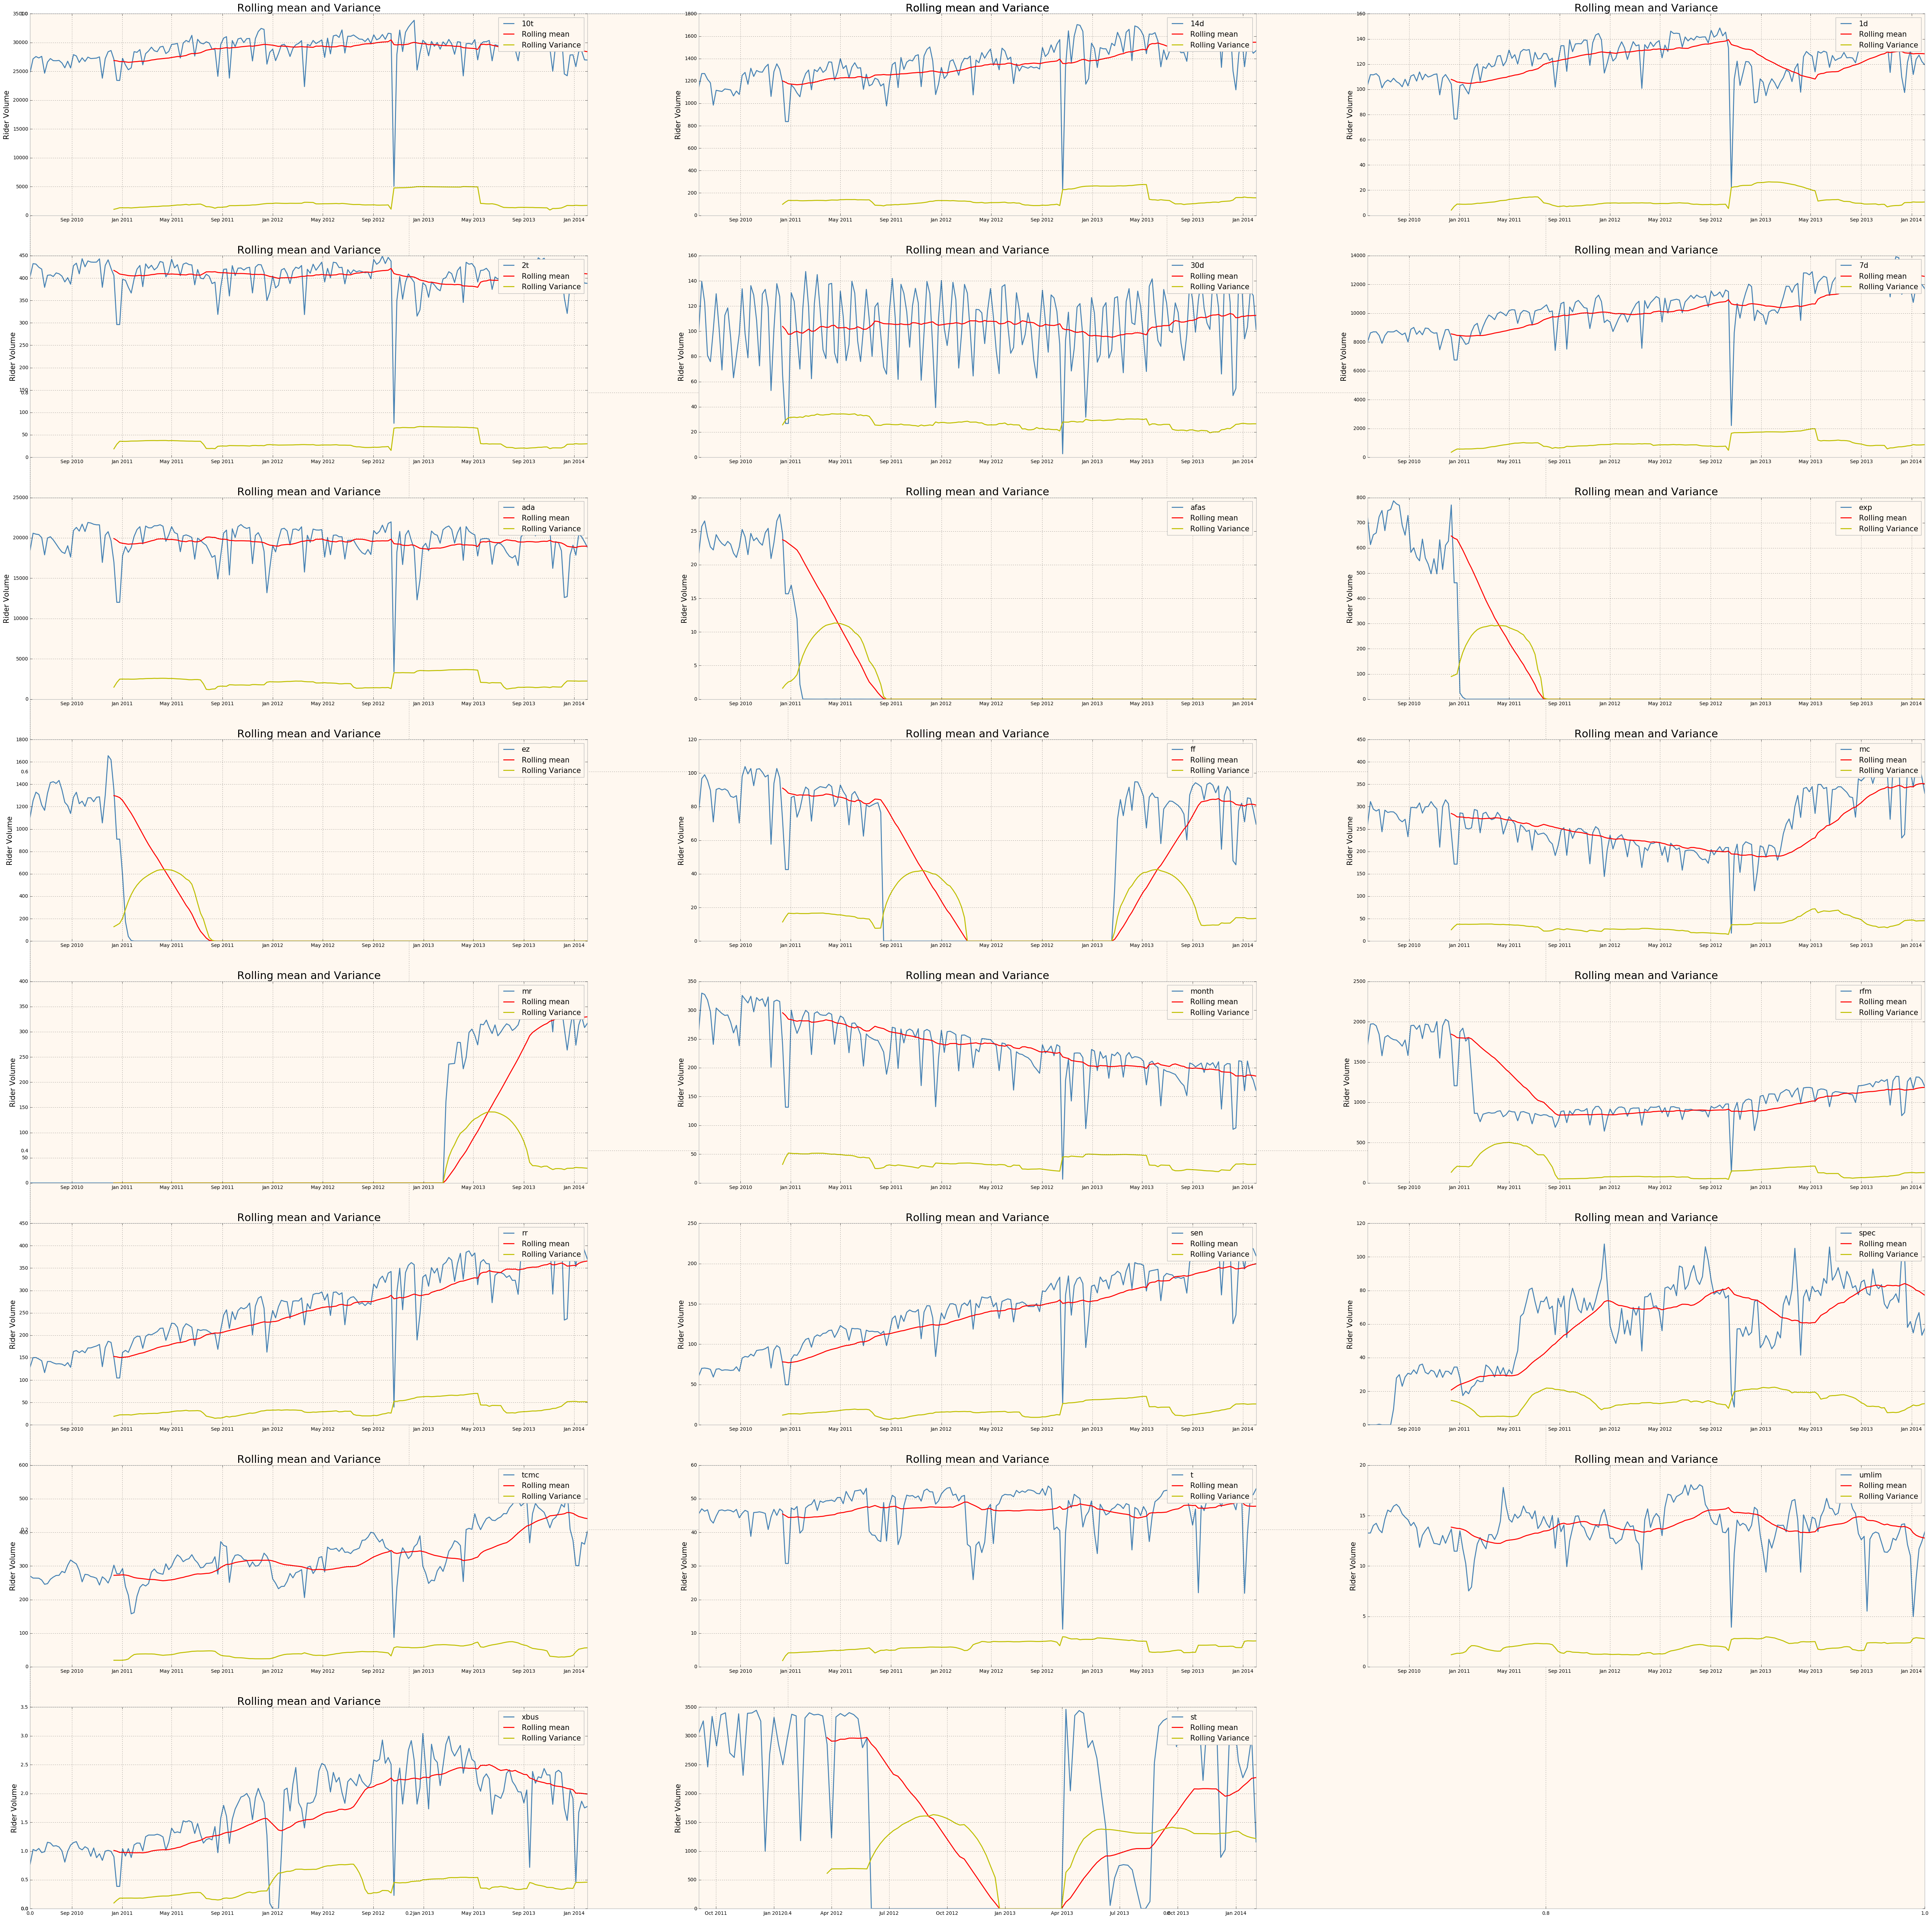

In [51]:
fig = plt.figure(figsize=(70,70)) 
x = 1

for i in ridetype:
    plt.title('Rolling mean and Variance',fontsize = 22)
    mean1 = pd.rolling_mean(mta_df2[i], 30)
    std1 = pd.rolling_std(mta_df2[i], 30)
    ax = fig.add_subplot(8,3,x)
    ax.plot(mta_df2.index, mta_df2[i], label = i)
    ax.plot(mta_df2.index, mean1, 'r', label ="Rolling mean")
    ax.plot(mta_df2.index, std1, 'y', label ="Rolling Variance")
    pl.ylabel("Rider Volume", fontsize=15)
    pl.legend(fontsize=15)
    x = x+1  


#### Figure 7: Rolling Mean for all type of Rides(23)

We can see from the plot that 14 day, 7 day, railroad, senior, special, transitcheck metrocard and expressbus have upward trend. However monthly passes have a downward trend.

The rolling variance also shows the same increasing trend in 14 day, 7 day, railroad, senior, special, transitcheck metrocard and expressbus card types. And decreasing trend in monthly passes card type.  

Therefore we can visualise the above plots and conclude that the steepest increase is seen in the following card types:     
14 day card, 7 day card, railroad card, senior card, special card, transitcheck metrocard and expressbus card .    
And the steepest decrease is seen in monthly pass card type.


In [26]:
#Calculating the ratio for first 10 weeks and the last 10 weeks.
mta_stationery = pd.DataFrame()
mta_stationery['first10weeks']= mta_df2.iloc[0:10,:].sum()
mta_stationery['last10weeks']= mta_df2.iloc[184:195,:].sum()
mta_stationery['Ratio'] = mta_stationery.first10weeks/ mta_stationery.last10weeks
mta_stationery

first10weeks    last10weeks          Ratio
10t    266793.721929  272981.144405       0.977334
14d     11525.385599   14449.642444       0.797624
1d       1078.201915    1199.858862       0.898607
2t       4119.058445    3851.466048       1.069478
30d      1036.370427    1072.651276       0.966176
7d      85011.077179  118301.987476       0.718594
ada    197009.742635  177512.456601       1.109836
afas      237.284521       0.049760    4768.555049
exp      7076.243247       0.075716   93458.215984
ez      12947.483984       0.019466  665116.356654
ff        891.427685     730.908415       1.219616
mc       2849.849635    3463.107594       0.822917
mr          0.125252    3110.311624       0.000040
month    2966.712079    1719.234283       1.725601
rfm     18237.820623   11863.084976       1.537359
rr       1394.053254    3619.683825       0.385131
sen       674.339178    1964.584950       0.343248
spec        9.804801     689.361489       0.014223
tcmc     2611.573982    4006.778508       0.651789
t         456.605879     467.049148       0.977640
umlim     143.175194     115.988366       1.234393
xbus       10.289082      17.128069       0.600715
st               NaN   23119.974548            NaN

#### Senior passes, spec passes have increased over the period of time. while monthly passes have decreased over the time.

## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [27]:
mta_df.head()

0        1       2        3        4        5        6    \
2010-05-23  126878.0  37306.0  6606.0  16378.0  18564.0  19987.0  12449.0   
2010-05-30  149477.0  46464.0  6881.0  17408.0  19903.0  20625.0  13644.0   
2010-06-06  152383.0  49359.0  7229.0  17595.0  19948.0  21225.0  13719.0   
2010-06-13  160175.0  44849.0  5731.0  14242.0  16076.0  17412.0  11460.0   
2010-06-20  162641.0  41509.0  7032.0  17589.0  20283.0  20909.0  14094.0   

                7        8         9   ...   590  591  592  593  594  595  \
2010-05-23  11091.0  10482.0  147187.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-05-30  11659.0  11030.0  154826.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-06  12037.0  10881.0  155958.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-13   9809.0   9123.0  154914.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-20  11944.0  10923.0  157628.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   

            596  597  598  599  
2010-05-23  0.0  0.0  0.0  0.0  
2010-05-30  0.0  0.0  0.0  0.0  
2010-06-06  0.0  0.0  0.0  0.0  
2010-06-13  0.0  0.0  0.0  0.0  
2010-06-20  0.0  0.0  0.0  0.0  

[5 rows x 600 columns]

In [68]:
N= len(mta_df) 
print ("The power is calulated at periods: \n", 1.0/np.fft.rfftfreq(N, 1.0)[1:]) #calcualting periods

('The power is calulated at periods: \n', array([ 194.        ,   97.        ,   64.66666667,   48.5       ,
         38.8       ,   32.33333333,   27.71428571,   24.25      ,
         21.55555556,   19.4       ,   17.63636364,   16.16666667,
         14.92307692,   13.85714286,   12.93333333,   12.125     ,
         11.41176471,   10.77777778,   10.21052632,    9.7       ,
          9.23809524,    8.81818182,    8.43478261,    8.08333333,
          7.76      ,    7.46153846,    7.18518519,    6.92857143,
          6.68965517,    6.46666667,    6.25806452,    6.0625    ,
          5.87878788,    5.70588235,    5.54285714,    5.38888889,
          5.24324324,    5.10526316,    4.97435897,    4.85      ,
          4.73170732,    4.61904762,    4.51162791,    4.40909091,
          4.31111111,    4.2173913 ,    4.12765957,    4.04166667,
          3.95918367,    3.88      ,    3.80392157,    3.73076923,
          3.66037736,    3.59259259,    3.52727273,    3.46428571,
          3.40350877

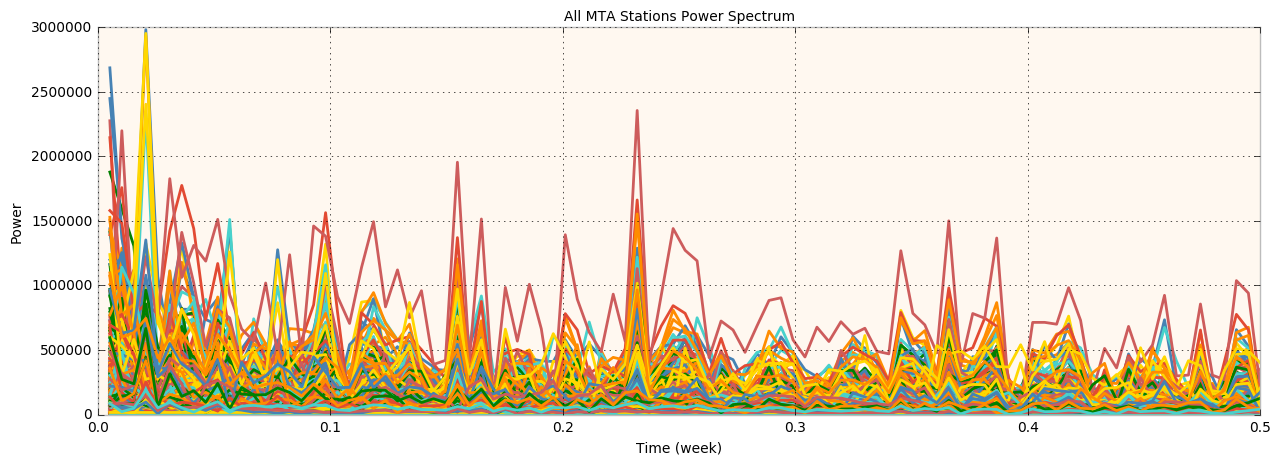

In [74]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
N= len(mta_df)
station_power= []
for i in range(len(mta_df.columns)):
    f = np.abs(np.fft.rfft(mta_df[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    # for each station, we know that the power value closest to a 52wk period is at INDEX 4
    station_power.append({'station':i, '52weekPower':f[4]}) #taking those values in a list
    pl.xlabel("Time (week)", fontsize=10)
    pl.ylabel("Power", fontsize=10)
    pl.title("All MTA Stations Power Spectrum", fontsize=10)
    
    pl.legend(fontsize = 5)


#### Figure 8: Power spectrum for 600 different MTA stations across a range of frequencies (periods).       
For the stations which have shown particularly high power around the 52 week period mark, iit's difficult to come up with any information from here. so let's print the list of 52weekpower.

In [77]:
station_powerdf = pd.DataFrame(station_power).sort_values(by='52weekPower', ascending=False)
station_powerdf.head(10)

52weekPower  station
0    2.980161e+06        0
194  2.950389e+06      194
150  2.931896e+06      150
327  2.402219e+06      327
32   2.329897e+06       32
539  1.351575e+06      539
19   1.324541e+06       19
169  1.221610e+06      169
56   1.078273e+06       56
54   1.039248e+06       54

from the above results, we see the power for 0, 194, 150, 327 and 32 is quite high. Higher the value of the power spectrum at a given period, the higher the periodicity of that station at that time.      
Therefore for stations 0, 194, 150, 327, 32  show the most prominent periodic trend on an annual period (52 weeks).     
In datacube, the indexes will be same as the above stations. Therefore in our datacube mtarides, we have      
mtarides[0], mtarides[194], mtarides[150], mtarides[327], mtarides[32] as the indexes.

In [81]:
mtarides[194]

array([[ 106171.,   61269.,  120730., ...,   45313.,   42688.,   43332.],
       [   3155.,    2373.,    3178., ...,    2360.,    2133.,    2287.],
       [    372.,     385.,     383., ...,     424.,     384.,     356.],
       ..., 
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [     nan,      nan,      nan, ...,    6965.,    8756.,    3905.]])